In [7]:
import math as m
from astropy.io import fits
import numpy as np
import socket
from pylab import *
%matplotlib inline
import urllib2
import matplotlib.pyplot as plt
from astroquery.vizier import Vizier
#result = Vizier.query_object('Barnard')
from astroquery.skyview import SkyView

all_surveys = []
survey_dict = SkyView.survey_dict
for wavelength in survey_dict:
    survey_list = survey_dict[wavelength]
    for survey in survey_list:
        if(wavelength != "overlay_red" and wavelength != "overlay_green" \
          and wavelength != "overlay_blue"):
           all_surveys.append(survey.encode("utf-8"))







In [39]:
viz = Vizier(columns=['_RAJ2000', '_DEJ2000'])
cat_list = viz.find_catalogs('UCAC')
print cat_list
for key in cat_list:
    cat = cat_list[key]
    for table in cat.tables:
        print table.fields

{u'I/289': <astropy.io.votable.tree.Resource object at 0x000000000D98A048>, u'J/AJ/125/2728': <astropy.io.votable.tree.Resource object at 0x000000001123CF98>, u'III/272': <astropy.io.votable.tree.Resource object at 0x000000000F1DECF8>, u'I/322A': <astropy.io.votable.tree.Resource object at 0x0000000010F1B048>}
[<astropy.io.votable.tree.Field object at 0x000000000D98A518>, <astropy.io.votable.tree.Field object at 0x000000000D98A5F8>, <astropy.io.votable.tree.Field object at 0x000000000D98A668>, <astropy.io.votable.tree.Field object at 0x000000000D98A780>, <astropy.io.votable.tree.Field object at 0x000000000D98A7F0>, <astropy.io.votable.tree.Field object at 0x000000000D98A908>, <astropy.io.votable.tree.Field object at 0x000000000D98A978>, <astropy.io.votable.tree.Field object at 0x000000000D98AA20>, <astropy.io.votable.tree.Field object at 0x000000000D98AB00>, <astropy.io.votable.tree.Field object at 0x000000000D98AB70>, <astropy.io.votable.tree.Field object at 0x000000000D98AC18>, <astr

In [1]:
sv = SkyView()
def plotImage(hduData):
    matplotlib.rcParams['figure.figsize'] = (20, 16)

    img_median=np.median(hduData)
    img_std=np.std(hduData)
    #print 'Science image - median: ',img_median
    #print 'Science image - stddev: ',img_std
    fig, ax = plt.subplots()
    im = ax.imshow(hduData,cmap=plt.get_cmap('hot'), interpolation='nearest', origin='lower',\
    vmin=img_median-(3*img_std), vmax=img_median+(5*img_std))
    fig.colorbar(im)
    plt.show()
    
image_stack = []
for indiv in all_surveys:
    try:
        paths = sv.get_images(position='Barnard', \
                        survey=indiv)
    except:
        print "Error, skipping"
    for hdulist in paths:
        for hdu in hdulist:
            width = hdu.header['NAXIS1']
            height = hdu.header['NAXIS2']
            print "width: " + str(width)
            print "height: " + str(hdu.header[height])
            data = hdu.data
            image_stack.append(data)
            plotImage(data)
            #data[150:160, 150:160] #[range in y, range in x]


NameError: name 'SkyView' is not defined

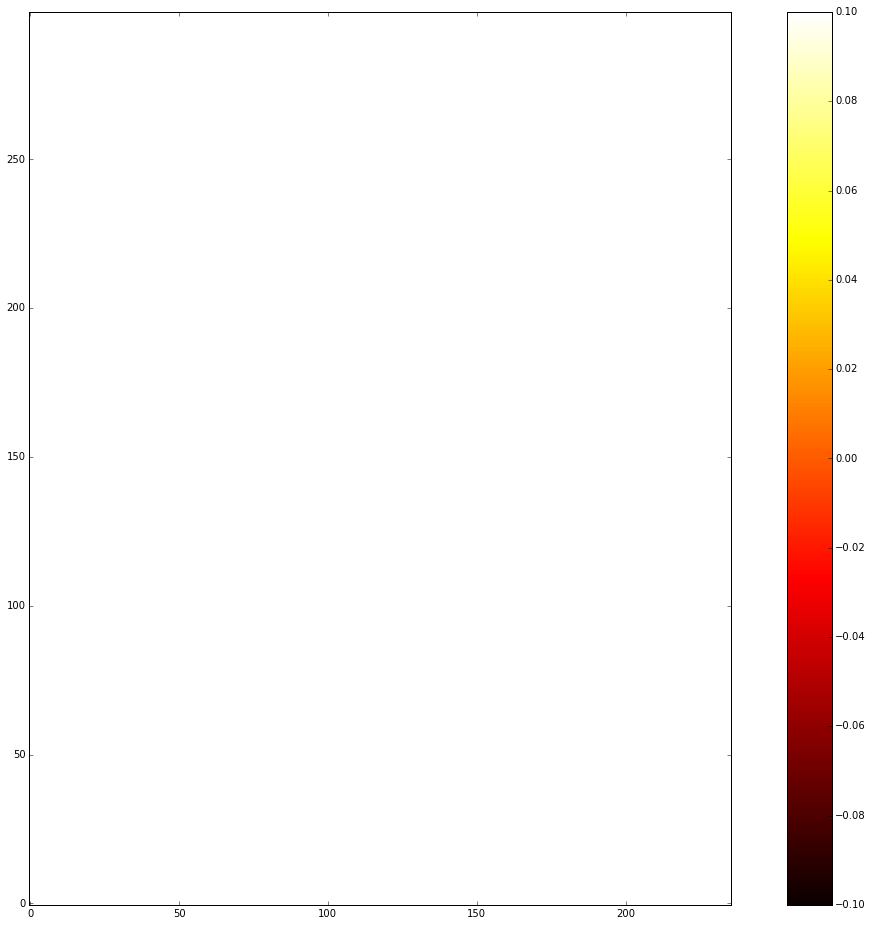

In [20]:
nx = 236
ny = 300

final_array = np.zeros((ny,nx,len(image_stack)),dtype='uint64')
for i in range(0, len(image_stack)):
  final_array[:,:,i] =  image_stack[i][:,64:2112]
#final_image = np.sum(image_stack, axis =0)
final_image = np.mean(final_array.astype(dtype='float32'),axis=2)
plotImage(final_image)